In [2]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
import pytorch_lightning as pl
from skimage.io import imread
from src import *   

In [25]:
path = Path("../data")
os.listdir(path)

['metadata',
 'observations',
 'patches-fr',
 'patches-us',
 'patches_sample',
 'pre-extracted',
 'rasters',
 'sample_submission.csv']

In [3]:
# from @tlorieul on Kaggle notebooks

df_obs_fr = pd.read_csv(path / "observations" / "observations_fr_train.csv", sep=";", index_col="observation_id")
df_obs_us = pd.read_csv(path / "observations" / "observations_us_train.csv", sep=";", index_col="observation_id")

df_obs = pd.concat((df_obs_fr, df_obs_us))

print("Number of observations for training: {}".format(len(df_obs)))

df_obs.head()

Number of observations for training: 1627475


,latitude,longitude,species_id,subset
observation_id,,,,
10561949,45.705116,1.424622,241,train
10131188,45.146973,6.416794,101,train
10799362,46.783695,-2.072855,700,train
10392536,48.604866,-2.825003,1456,train
10335049,48.815567,-0.161431,157,train


In [4]:
mode = "train"
obs_fr = pd.read_csv(path / "observations" / f"observations_fr_{mode}.csv", sep=";")
obs_us = pd.read_csv(path / "observations" / f"observations_us_{mode}.csv", sep=";")
obs = pd.concat([obs_fr, obs_us])

In [5]:
obs

,observation_id,latitude,longitude,species_id,subset
0,10561949,45.705116,1.424622,241,train
1,10131188,45.146973,6.416794,101,train
2,10799362,46.783695,-2.072855,700,train
3,10392536,48.604866,-2.825003,1456,train
4,10335049,48.815567,-0.161431,157,train
...,...,...,...,...,...
956226,22068171,29.602327,-94.555860,5041,train
956227,22068172,38.029580,-122.883995,8688,train
956228,22068173,37.913720,-121.948814,12154,train
956229,22068174,37.206974,-122.067154,5309,val


In [8]:
obs_val = obs[obs["subset"] == "val"]

In [20]:
obs[(obs["latitude"].between(30, 35) & obs["longitude"].between(-85, -80))]

,observation_id,latitude,longitude,species_id,subset
5,20000180,32.684006,-80.344696,4916,train
28,20000211,33.789425,-84.373790,2992,train
51,20000236,30.392809,-84.219230,2537,train
111,20000302,34.979214,-80.090630,4994,train
188,20000394,34.136395,-80.871420,5056,train
...,...,...,...,...,...
956094,22068018,30.454390,-84.093310,7944,train
956103,22068028,34.136204,-84.699890,2682,train
956111,22068036,33.928493,-84.366660,2767,train
956216,22068159,30.072308,-81.334250,8894,train


In [9]:
obs[obs["species_id"].isin([0,1])]

,observation_id,latitude,longitude,species_id,subset
415,10076588,45.525490,6.066895,0,train
1811,10802756,50.282299,3.158008,1,train
2549,10541681,48.886154,2.070827,0,train
2569,10464742,46.892979,6.221924,1,train
2997,10626720,45.637188,4.683302,0,train
...,...,...,...,...,...
267913,20578384,47.774685,-121.911140,0,train
274721,20592987,43.850384,-69.628456,0,train
478392,21032636,35.683403,-79.611330,1,train
594343,21283569,44.394947,-68.220535,0,train


Total number of species: 6661


(1, 245.00000000000009)

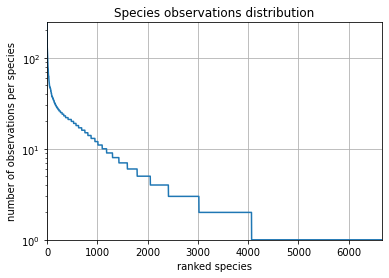

In [10]:
#species_value_counts = df_obs["species_id"].value_counts()
species_value_counts = obs_val["species_id"].value_counts()

print("Total number of species: {}".format(len(species_value_counts)))


fig = plt.figure()
ax = fig.gca()

x = np.arange(int(len(species_value_counts)))
ax.plot(x, species_value_counts)

ax.set_yscale("log")

ax.set_xlabel("ranked species")
ax.set_ylabel("number of observations per species")
ax.set_title("Species observations distribution")

ax.grid()
ax.autoscale(tight=True)
ax.set_ylim(bottom=1)

In [29]:
species_value_counts = obs["species_id"].value_counts()

In [12]:
obs

,observation_id,latitude,longitude,species_id,subset
0,10561949,45.705116,1.424622,241,train
1,10131188,45.146973,6.416794,101,train
2,10799362,46.783695,-2.072855,700,train
3,10392536,48.604866,-2.825003,1456,train
4,10335049,48.815567,-0.161431,157,train
...,...,...,...,...,...
956226,22068171,29.602327,-94.555860,5041,train
956227,22068172,38.029580,-122.883995,8688,train
956228,22068173,37.913720,-121.948814,12154,train
956229,22068174,37.206974,-122.067154,5309,val


In [49]:
[species_value_counts[0:1000].index]

[Int64Index([5045, 3072, 2902, 5053, 3034, 5095, 3495,  389, 4918, 5068,
             ...
              200, 1259,  786,  102,  633,  587,  177,  994,  170, 1167],
            dtype='int64', length=600)]

In [11]:
species_value_counts[:2000].sum()

31862

In [15]:
for i in obs.iterrows():
    print(i)
    break

(0, observation_id     10561949
latitude          45.705116
longitude          1.424622
species_id              241
subset                train
Name: 0, dtype: object)


In [26]:
for lat0, lat1 in zip(range(25, 50, 5), range(30, 55, 5)):
    for lon0, lon1 in zip(range(-125, -65, 5), range(-130, -70, 5)):
        obs[(obs["latitude"].between(lat0, lat1) & obs["longitude"].between(lon0, lon1))]
        

,observation_id,latitude,longitude,species_id,subset
0,10561949,45.705116,1.424622,241,train
1,10131188,45.146973,6.416794,101,train
2,10799362,46.783695,-2.072855,700,train
3,10392536,48.604866,-2.825003,1456,train
4,10335049,48.815567,-0.161431,157,train
...,...,...,...,...,...
956226,22068171,29.602327,-94.555860,5041,train
956227,22068172,38.029580,-122.883995,8688,train
956228,22068173,37.913720,-121.948814,12154,train
956229,22068174,37.206974,-122.067154,5309,val
